In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers

In [91]:
data = pd.read_csv("heart_attack_prediction_dataset (1).csv")

In [92]:
data.head()

,Patient ID,Age,Sex,Cholesterol,sys0,dys0,sys1,dys1,sys2,dys2,...,Obesity,Alcohol Consumption,Diet,Previous Heart Problems,Medication Use,Stress Level,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day
0,BMW7812,67.0,Male,208.0,158.0,88.0,140.0,112.0,135.0,90.0,...,0.0,0.0,Average,0.0,0.0,9.0,31.251233,286.0,0.0,6.0
1,CZE1114,21.0,Male,389.0,165.0,93.0,130.0,112.0,133.0,114.0,...,1.0,1.0,Unhealthy,1.0,0.0,1.0,27.194973,235.0,1.0,7.0
2,BNI9906,21.0,Female,324.0,174.0,99.0,134.0,115.0,133.0,112.0,...,0.0,0.0,Healthy,1.0,1.0,9.0,28.176571,587.0,4.0,4.0
3,JLN3497,84.0,Male,383.0,163.0,100.0,132.0,92.0,140.0,98.0,...,0.0,1.0,Average,1.0,0.0,9.0,36.464704,378.0,3.0,4.0
4,GFO8847,66.0,Male,318.0,91.0,88.0,140.0,93.0,134.0,116.0,...,1.0,0.0,Unhealthy,1.0,0.0,6.0,21.809144,231.0,1.0,5.0


In [93]:
data.describe()

,Age,Cholesterol,sys0,dys0,sys1,dys1,sys2,dys2,sys3,dys3,...,Smoking,Obesity,Alcohol Consumption,Previous Heart Problems,Medication Use,Stress Level,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day
count,8763.000000,8763.000000,8763.000000,8763.000000,8764.000000,8764.000000,8763.000000,8763.000000,8762.000000,8762.000000,...,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,259.877211,135.075659,85.156111,134.978663,104.581812,134.980486,104.478033,135.013353,104.618923,...,0.896839,0.501426,0.598083,0.495835,0.498345,5.469702,28.891446,417.677051,3.489672,7.023508
std,21.249509,80.863276,26.349976,14.676565,3.161755,9.235580,3.168725,9.255698,3.153231,9.238057,...,0.304186,0.500026,0.490313,0.500011,0.500026,2.859622,6.319181,223.748137,2.282687,1.988473
min,18.000000,120.000000,90.000000,60.000000,130.000000,89.000000,130.000000,89.000000,130.000000,89.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,18.002337,30.000000,0.000000,4.000000
25%,35.000000,192.000000,112.000000,72.000000,132.000000,96.000000,132.000000,96.000000,132.000000,97.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,23.422985,225.500000,2.000000,5.000000
50%,54.000000,259.000000,135.000000,85.000000,135.000000,105.000000,135.000000,104.000000,135.000000,105.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,5.000000,28.768999,417.000000,3.000000,7.000000
75%,72.000000,330.000000,158.000000,98.000000,138.000000,113.000000,138.000000,113.000000,138.000000,113.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,34.324594,612.000000,5.000000,9.000000
max,90.000000,400.000000,180.000000,110.000000,140.000000,120.000000,140.000000,120.000000,140.000000,120.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,39.997211,800.000000,7.000000,10.000000


In [94]:
data.columns

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'sys0', 'dys0', 'sys1',
       'dys1', 'sys2', 'dys2', 'sys3', 'dys3', 'Heart Rate', 'Diabetes',
       'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level', 'BMI',
       'Triglycerides', 'Physical Activity Days Per Week',
       'Sleep Hours Per Day'],
      dtype='object')

In [95]:
# dataset 0
ctg_data = data[['Sex','Diet']]
#data set 1
#ctg_data = data[['Sex','Diet','Continent','Country','Hemisphere']]
data = pd.get_dummies(data, columns = ['Sex'])

In [96]:
# sex_map = {'Male':1,'Female':2}
# data['Sex']=data['Sex'].map(sex_map)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26289 entries, 0 to 26288
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   float64
 2   Cholesterol                      8763 non-null   float64
 3   sys0                             8763 non-null   float64
 4   dys0                             8763 non-null   float64
 5   sys1                             8764 non-null   float64
 6   dys1                             8764 non-null   float64
 7   sys2                             8763 non-null   float64
 8   dys2                             8763 non-null   float64
 9   sys3                             8762 non-null   float64
 10  dys3                             8762 non-null   float64
 11  Heart Rate                       8763 non-null   float64
 12  Diabetes          

In [97]:
# data['BP_Systolic'] = data['Blood Pressure'].apply(lambda x: x.split('/')[0])
# data['BP_Diastolic'] = data['Blood Pressure'].apply(lambda x: x.split('/')[1])

In [98]:
ordinal_map = {'Healthy':3,'Average':2,'Unhealthy':1}
data['Diet'] = data['Diet'].map(ordinal_map)

In [99]:
# cat_columns = ['Sex_Female','Sex_Male','BP_Systolic','BP_Diastolic']
cat_columns = ['Sex_Female','Sex_Male']
#data[cat_columns] = data[cat_columns].astype(int)

In [100]:
# plt.figure(figsize=(8, 7))
# for i in ctg_data.columns:
#     ctg_num = ctg_data[i].value_counts()
#     chart = sns.barplot(x = ctg_num.index, y = ctg_num)
#     for p in chart.patches:
#         chart.annotate(format(p.get_height(), '.0f'), 
#                      (p.get_x() + p.get_width() / 2., p.get_height()), 
#                      ha = 'center', va = 'center', 
#                      xytext = (0, 10), 
#                      textcoords = 'offset points',
#                      fontsize=10)
        
#     chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
#     plt.show() 

In [106]:
data.head(30)

,Patient ID,Age,Cholesterol,sys0,dys0,sys1,dys1,sys2,dys2,sys3,...,Diet,Previous Heart Problems,Medication Use,Stress Level,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Sex_Female,Sex_Male
0,BMW7812,67.0,208.0,158.0,88.0,140.0,112.0,135.0,90.0,131.0,...,2.0,0.0,0.0,9.0,31.251233,286.0,0.0,6.0,0,1
1,CZE1114,21.0,389.0,165.0,93.0,130.0,112.0,133.0,114.0,133.0,...,1.0,1.0,0.0,1.0,27.194973,235.0,1.0,7.0,0,1
2,BNI9906,21.0,324.0,174.0,99.0,134.0,115.0,133.0,112.0,135.0,...,3.0,1.0,1.0,9.0,28.176571,587.0,4.0,4.0,1,0
3,JLN3497,84.0,383.0,163.0,100.0,132.0,92.0,140.0,98.0,133.0,...,2.0,1.0,0.0,9.0,36.464704,378.0,3.0,4.0,0,1
4,GFO8847,66.0,318.0,91.0,88.0,140.0,93.0,134.0,116.0,131.0,...,1.0,1.0,0.0,6.0,21.809144,231.0,1.0,5.0,0,1
5,ZOO7941,54.0,297.0,172.0,86.0,139.0,119.0,130.0,115.0,139.0,...,1.0,1.0,1.0,2.0,20.146839,795.0,5.0,10.0,1,0
6,WYV0966,90.0,358.0,102.0,73.0,130.0,97.0,132.0,97.0,136.0,...,3.0,0.0,0.0,7.0,28.885811,284.0,4.0,10.0,0,1
7,XXM0972,84.0,220.0,131.0,68.0,135.0,120.0,131.0,117.0,130.0,...,2.0,0.0,1.0,4.0,22.221862,370.0,6.0,7.0,0,1
8,XCQ5937,20.0,145.0,144.0,105.0,133.0,90.0,135.0,107.0,138.0,...,2.0,0.0,0.0,5.0,35.809901,790.0,7.0,4.0,0,1
9,FTJ5456,43.0,248.0,160.0,70.0,131.0,112.0,132.0,93.0,138.0,...,1.0,0.0,0.0,4.0,22.558917,232.0,7.0,7.0,1,0


C:\Users\Yash\AppData\Local\Temp\ipykernel_6664\2857627985.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  'Sleep Hours Per Day', 'Sex_Female','Sex_Male']].corr(), cmap="YlGnBu",


<Axes: >

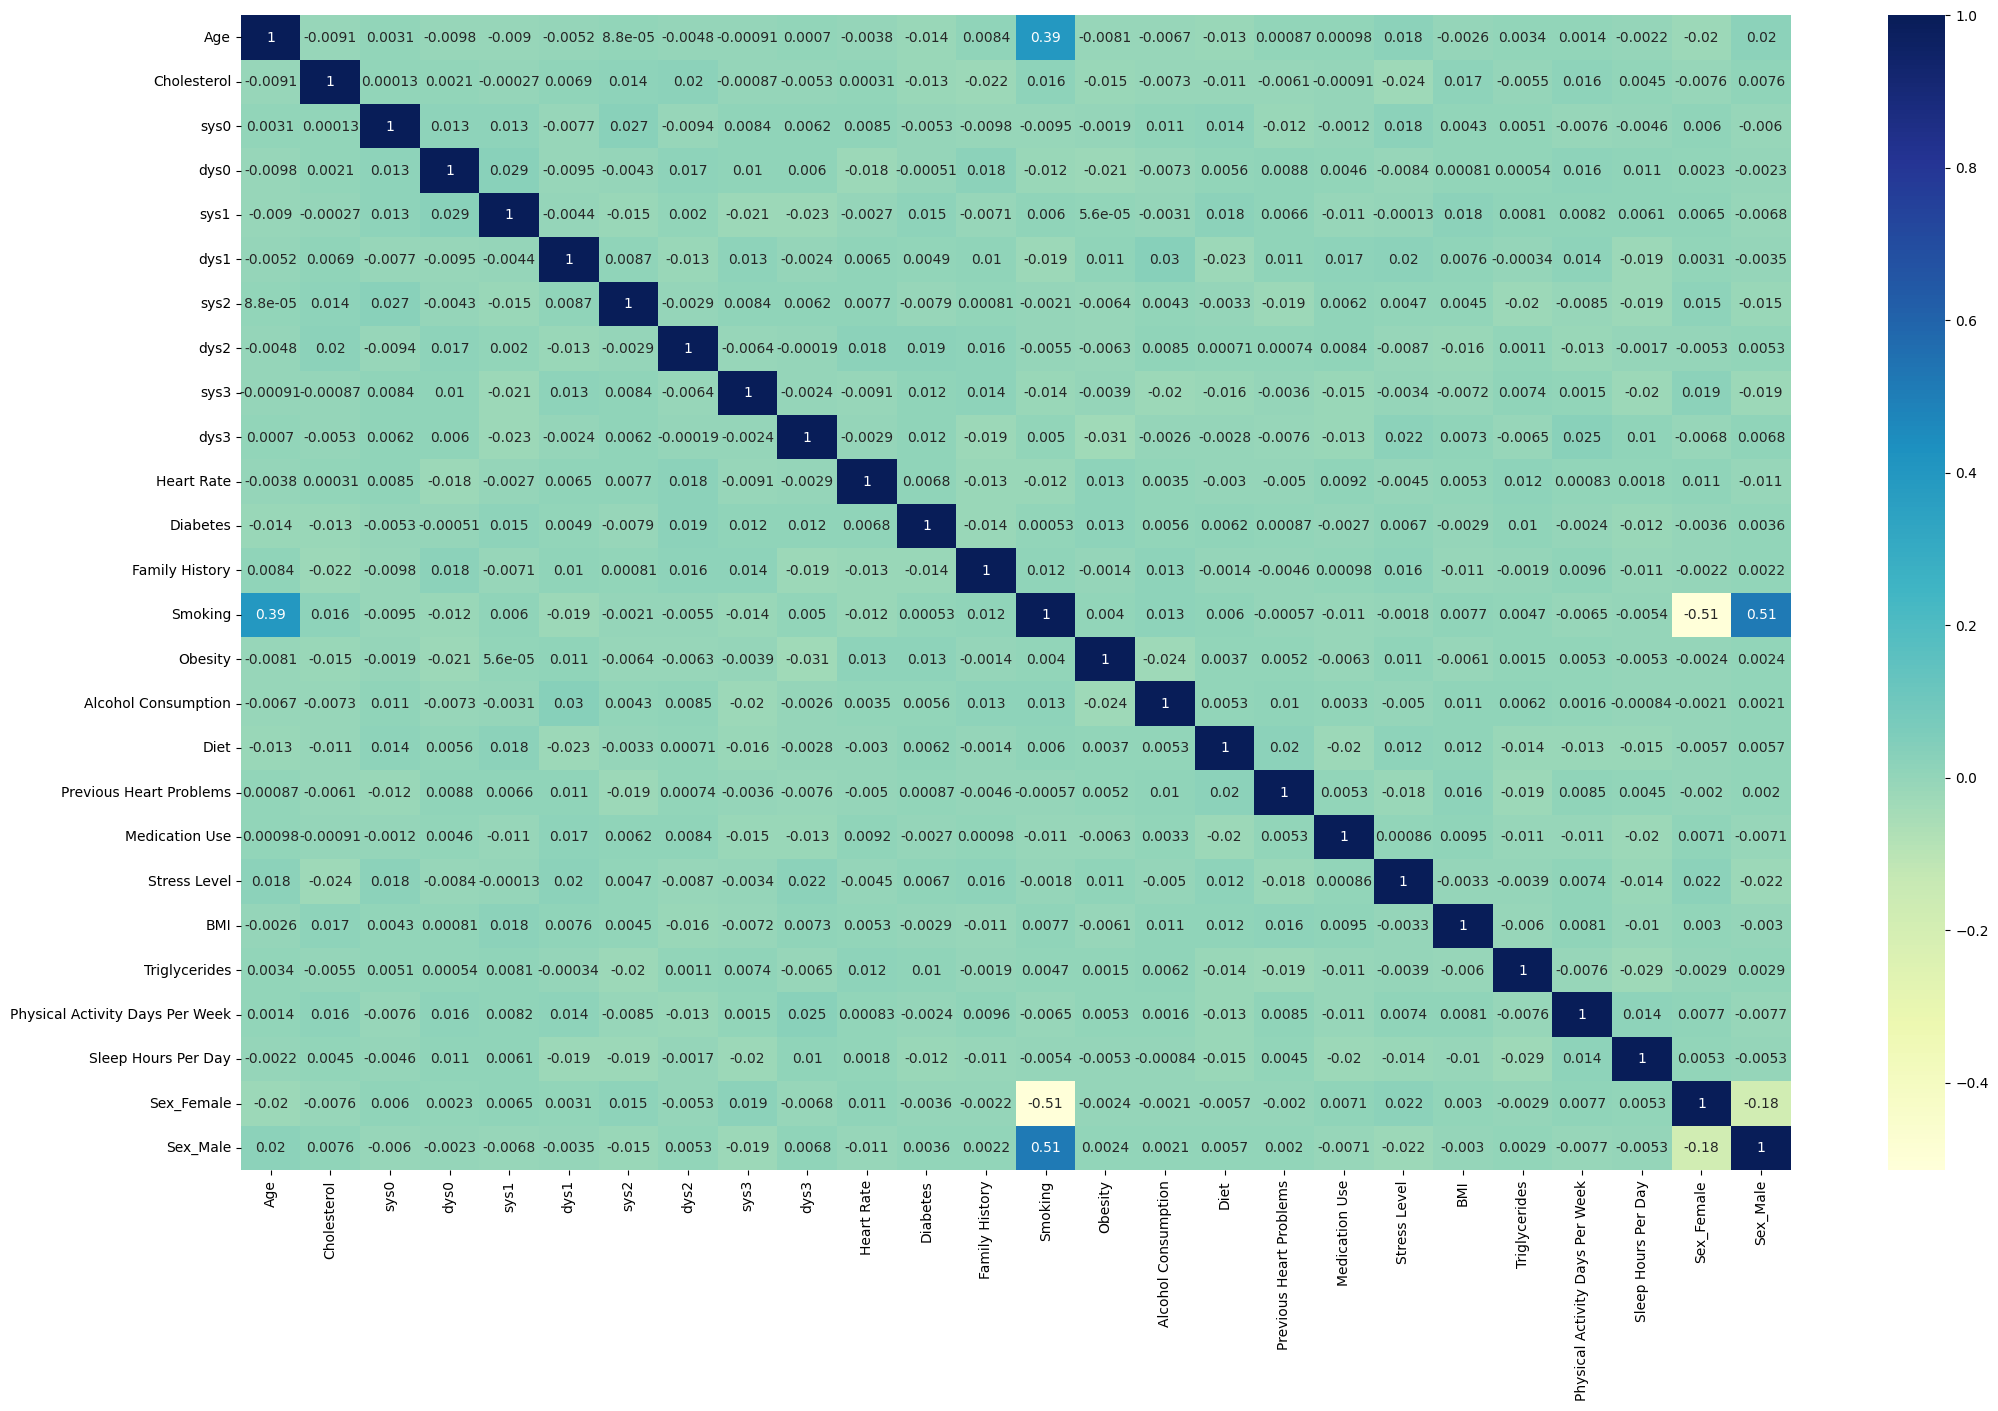

In [101]:
plt.figure(figsize = (25,15))
sns.heatmap(data[['Patient ID', 'Age', 'Cholesterol', 'sys0', 'dys0', 'sys1',
       'dys1', 'sys2', 'dys2', 'sys3', 'dys3', 'Heart Rate', 'Diabetes',
       'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level', 'BMI',
       'Triglycerides', 'Physical Activity Days Per Week',
       'Sleep Hours Per Day', 'Sex_Female','Sex_Male']].corr(), cmap="YlGnBu",
            annot=True)

In [102]:
#data = pd.get_dummies(data, columns = ['Country','Continent','Hemisphere'])

In [103]:
data.dtypes

Patient ID                          object
Age                                float64
Cholesterol                        float64
sys0                               float64
dys0                               float64
sys1                               float64
dys1                               float64
sys2                               float64
dys2                               float64
sys3                               float64
dys3                               float64
Heart Rate                         float64
Diabetes                           float64
Family History                     float64
Smoking                            float64
Obesity                            float64
Alcohol Consumption                float64
Diet                               float64
Previous Heart Problems            float64
Medication Use                     float64
Stress Level                       float64
BMI                                float64
Triglycerides                      float64
Physical Ac

In [104]:
data.columns

Index(['Patient ID', 'Age', 'Cholesterol', 'sys0', 'dys0', 'sys1', 'dys1',
       'sys2', 'dys2', 'sys3', 'dys3', 'Heart Rate', 'Diabetes',
       'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level', 'BMI',
       'Triglycerides', 'Physical Activity Days Per Week',
       'Sleep Hours Per Day', 'Sex_Female', 'Sex_Male'],
      dtype='object')

In [115]:
X = data [['Age', 'Cholesterol', 'sys0', 'dys0', 'sys1', 'dys1',
       'sys2', 'dys2', 'sys3', 'dys3', 'Heart Rate', 'Diabetes',
       'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level', 'BMI',
       'Triglycerides', 'Physical Activity Days Per Week',
       'Sleep Hours Per Day', 'Sex_Female', 'Sex_Male']]
#Y = data [['Heart Attack Risk']]


In [118]:
df = data.loc[(data["Sex_Female"] == 1) & (data["Sex_Male"] == 1)]
df.head()

,Patient ID,Age,Cholesterol,sys0,dys0,sys1,dys1,sys2,dys2,sys3,...,Diet,Previous Heart Problems,Medication Use,Stress Level,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Sex_Female,Sex_Male


In [ ]:
train_x = X